<a href="https://colab.research.google.com/github/balados85/deep-learning-brain-mri-classification/blob/main/custom_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Grayscale, Compose, Resize, Scale
import matplotlib.pyplot as plt

In [17]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path) # Converts to tensor
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        sample = {"image": image, "label": label}
        return sample

In [25]:
from os import listdir
from os.path import isfile, join
import csv

label_id = {0:'glioma', 1:'meningioma', 1:'pituitary'}
with open('drive/MyDrive/mri_images/train/train.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['image_location', 'label']) # Write header
    for dirs in listdir("drive/MyDrive/mri_images/train"):
#         print(dirs)
        if(dirs.endswith(".csv") or dirs.endswith(".DS_Store")):
            continue
        for f in listdir(join("drive/MyDrive/mri_images/train", dirs)):
            if(join("drive/MyDrive/mri_images/train", dirs, f).endswith(".csv") or f == ".DS_Store"):
                continue
            elif isfile(join("drive/MyDrive/mri_images/train", dirs, f)):
                writer.writerow([join(dirs, f), dirs])

In [26]:
# Might be a good idea to make the image in grayscale and make them smaller (check here: https://pytorch.org/vision/stable/transforms.html)
edd_train = CustomImageDataset('drive/MyDrive/mri_images/train/train.csv', 'drive/MyDrive/mri_images/train')

print(len(edd_train))
sample = edd_train[0]
print(type(sample["image"]))
print(sample["image"].shape)

# print(edd_train[0])

2502
<class 'torch.Tensor'>
torch.Size([1, 512, 512])


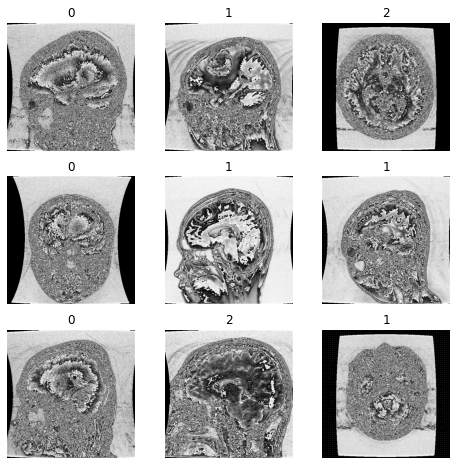

In [29]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(edd_train), size=(1,)).item() # Get rnd_id
    sample = edd_train[sample_idx] # index dataset (gets you the img and label - index)
    img, label = sample["image"], sample["label"]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray") # if the image is grayscale
   # plt.imshow(img.permute(1,2,0)) # put channel as the last dimension
plt.show()